In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from perovskiteml.data import PerovskiteDatabase

In [55]:
def plot_barh(
    val_counts: pd.Series,
    title: str = "",
    ylabel: str = "feature",
    xscale: str = "log",
    xmargin: float = 0.2,
    max_display: int = 20,  # How many features to show
):
    other_counts = val_counts[max_display:].sum()
    val_counts = val_counts[:max_display].copy()
    val_counts["other"] = other_counts
    
    fig, ax = plt.subplots()
    hbars = ax.barh(val_counts.index.astype(str), val_counts.values, align="center")
    ax.bar_label(hbars)
    ax.invert_yaxis()
    ax.margins(x=xmargin)
    ax.set_xscale(xscale)
    ax.set_title(title)
    ax.set_xlabel("counts")
    ax.set_ylabel(ylabel)
    fig.tight_layout()
    return (fig, ax)

In [2]:
database_path = "../data/clean"
database = PerovskiteDatabase.load(database_path)
database.data

,Ref_ID,Ref_ID_temp,Ref_name_of_person_entering_the_data,Ref_data_entered_by_author,Ref_DOI_number,Ref_lead_author,Ref_publication_date,Ref_journal,Ref_part_of_initial_dataset,Ref_original_filename_data_upload,...,Outdoor_PCE_Tse80,Outdoor_PCE_after_1000_h,Outdoor_power_generated,Outdoor_link_raw_data_for_outdoor_trace,Outdoor_detaild_weather_data_available,Outdoor_link_detailed_weather_data,Outdoor_spectral_data_available,Outdoor_link_spectral_data,Outdoor_irradiance_measured,Outdoor_link_irradiance_data
0,1,1,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
1,2,2,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
2,3,3,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
3,4,4,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
4,5,5,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43247,43623,11,Daniele T. Cuzzupè,True,10.1002/solr.202300770,Cuzzupè et al.,2023-10-11,Solar RRL,False,2023-12-01 _v1.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
43248,43624,12,Daniele T. Cuzzupè,True,10.1002/solr.202300770,Cuzzupè et al.,2023-10-11,Solar RRL,False,2023-12-01 _v1.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
43249,43625,13,Daniele T. Cuzzupè,True,10.1002/solr.202300770,Cuzzupè et al.,2023-10-11,Solar RRL,False,2023-12-01 _v1.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
43250,10974,10974,Gerrit Boschloo,False,10.1039/c8se00450a,Baranwal et al.,2018-10-23,Sustainable Energy & Fuels,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN


In [5]:
processed = database.data.loc[:, [
    "Perovskite_dimension_3D",
    "Perovskite_composition_perovskite_ABC3_structure",
    "Perovskite_composition_long_form",
    "Perovskite_composition_a_ions",
    "Perovskite_composition_a_ions_coefficients",
    "Perovskite_composition_b_ions",
    "Perovskite_composition_b_ions_coefficients",
    "Perovskite_composition_c_ions",
    "Perovskite_composition_c_ions_coefficients"
]]
processed

,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_long_form,Perovskite_composition_a_ions,Perovskite_composition_a_ions_coefficients,Perovskite_composition_b_ions,Perovskite_composition_b_ions_coefficients,Perovskite_composition_c_ions,Perovskite_composition_c_ions_coefficients
0,True,True,CsSnI3,Cs,1,Sn,1,I,3
1,True,True,CsSnBr0.3I2.7,Cs,1,Sn,1,Br; I,0.3; 2.7
2,True,True,CsSnBr1.5I1.5,Cs,1,Sn,1,Br; I,1.5; 1.5
3,True,True,CsSnBr2.7I0.3,Cs,1,Sn,1,Br; I,2.7; 0.3
4,True,True,CsSnBr3,Cs,1,Sn,1,Br,3
...,...,...,...,...,...,...,...,...,...
43247,False,True,(PEA)0.08FA0.92SnI3,(PEA); FA,0.08; 0.92,Sn,1,I,3
43248,False,True,(PEA)0.08FA0.92SnI3,(PEA); FA,0.08; 0.92,Sn,1,I,3
43249,False,True,(PEA)0.08FA0.92SnI3,(PEA); FA,0.08; 0.92,Sn,1,I,3
43250,True,True,MAPbI3,MA,1,Pb,1,I,3


In [6]:
processed.dropna(subset=["Perovskite_composition_long_form"], inplace=True)
processed

,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_long_form,Perovskite_composition_a_ions,Perovskite_composition_a_ions_coefficients,Perovskite_composition_b_ions,Perovskite_composition_b_ions_coefficients,Perovskite_composition_c_ions,Perovskite_composition_c_ions_coefficients
0,True,True,CsSnI3,Cs,1,Sn,1,I,3
1,True,True,CsSnBr0.3I2.7,Cs,1,Sn,1,Br; I,0.3; 2.7
2,True,True,CsSnBr1.5I1.5,Cs,1,Sn,1,Br; I,1.5; 1.5
3,True,True,CsSnBr2.7I0.3,Cs,1,Sn,1,Br; I,2.7; 0.3
4,True,True,CsSnBr3,Cs,1,Sn,1,Br,3
...,...,...,...,...,...,...,...,...,...
43247,False,True,(PEA)0.08FA0.92SnI3,(PEA); FA,0.08; 0.92,Sn,1,I,3
43248,False,True,(PEA)0.08FA0.92SnI3,(PEA); FA,0.08; 0.92,Sn,1,I,3
43249,False,True,(PEA)0.08FA0.92SnI3,(PEA); FA,0.08; 0.92,Sn,1,I,3
43250,True,True,MAPbI3,MA,1,Pb,1,I,3


In [7]:
processed.dropna(subset=["Perovskite_composition_perovskite_ABC3_structure"], inplace=True)
processed = processed[processed["Perovskite_dimension_3D"]]
processed = processed[processed["Perovskite_composition_perovskite_ABC3_structure"]]
processed

,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_long_form,Perovskite_composition_a_ions,Perovskite_composition_a_ions_coefficients,Perovskite_composition_b_ions,Perovskite_composition_b_ions_coefficients,Perovskite_composition_c_ions,Perovskite_composition_c_ions_coefficients
0,True,True,CsSnI3,Cs,1,Sn,1,I,3
1,True,True,CsSnBr0.3I2.7,Cs,1,Sn,1,Br; I,0.3; 2.7
2,True,True,CsSnBr1.5I1.5,Cs,1,Sn,1,Br; I,1.5; 1.5
3,True,True,CsSnBr2.7I0.3,Cs,1,Sn,1,Br; I,2.7; 0.3
4,True,True,CsSnBr3,Cs,1,Sn,1,Br,3
...,...,...,...,...,...,...,...,...,...
43234,True,True,Cs0.18FA0.82PbBr0.24I2.82,Cs; FA,0.18; 0.82,Pb,1,Br; I,0.24; 2.82
43235,True,True,Cs0.18FA0.82PbBr0.24I2.82,Cs; FA,0.18; 0.82,Pb,1,Br; I,0.24; 2.82
43236,True,True,Cs0.18FA0.82PbBr0.24I2.82,Cs; FA,0.18; 0.82,Pb,1,Br; I,0.24; 2.82
43250,True,True,MAPbI3,MA,1,Pb,1,I,3


In [8]:
multi_layer_count = processed["Perovskite_composition_long_form"].str.contains(r'\|').sum()
print(f"Number of entries with multiple perovskite layers: {multi_layer_count}")

Number of entries with multiple perovskite layers: 233


In [9]:
processed["Perovskite_composition_long_form"] = processed["Perovskite_composition_long_form"].astype(str)

multi_layer_mask = processed["Perovskite_composition_long_form"].str.contains(r'\|')
processed = processed[~multi_layer_mask]
processed

,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_long_form,Perovskite_composition_a_ions,Perovskite_composition_a_ions_coefficients,Perovskite_composition_b_ions,Perovskite_composition_b_ions_coefficients,Perovskite_composition_c_ions,Perovskite_composition_c_ions_coefficients
0,True,True,CsSnI3,Cs,1,Sn,1,I,3
1,True,True,CsSnBr0.3I2.7,Cs,1,Sn,1,Br; I,0.3; 2.7
2,True,True,CsSnBr1.5I1.5,Cs,1,Sn,1,Br; I,1.5; 1.5
3,True,True,CsSnBr2.7I0.3,Cs,1,Sn,1,Br; I,2.7; 0.3
4,True,True,CsSnBr3,Cs,1,Sn,1,Br,3
...,...,...,...,...,...,...,...,...,...
43234,True,True,Cs0.18FA0.82PbBr0.24I2.82,Cs; FA,0.18; 0.82,Pb,1,Br; I,0.24; 2.82
43235,True,True,Cs0.18FA0.82PbBr0.24I2.82,Cs; FA,0.18; 0.82,Pb,1,Br; I,0.24; 2.82
43236,True,True,Cs0.18FA0.82PbBr0.24I2.82,Cs; FA,0.18; 0.82,Pb,1,Br; I,0.24; 2.82
43250,True,True,MAPbI3,MA,1,Pb,1,I,3


In [42]:
comp_data: pd.DataFrame = processed.loc[:,[
    "Perovskite_composition_long_form",
    "Perovskite_composition_a_ions",
    "Perovskite_composition_a_ions_coefficients",
    "Perovskite_composition_b_ions",
    "Perovskite_composition_b_ions_coefficients",
    "Perovskite_composition_c_ions",
    "Perovskite_composition_c_ions_coefficients"
]].copy()
comp_data.rename(columns={
    'Perovskite_composition_long_form': 'perovskite',
    "Perovskite_composition_a_ions": "a_ions",
    "Perovskite_composition_a_ions_coefficients": "a_coeff",
    "Perovskite_composition_b_ions": "b_ions",
    "Perovskite_composition_b_ions_coefficients": "b_coeff",
    "Perovskite_composition_c_ions": "c_ions",
    "Perovskite_composition_c_ions_coefficients": "c_coeff"
}, inplace=True)
comp_data.reset_index(inplace=True, drop=True)
comp_data.dropna(inplace=True)
comp_data = comp_data[~comp_data["a_ions"].str.contains("nan")]
comp_data

,perovskite,a_ions,a_coeff,b_ions,b_coeff,c_ions,c_coeff
0,CsSnI3,Cs,1,Sn,1,I,3
1,CsSnBr0.3I2.7,Cs,1,Sn,1,Br; I,0.3; 2.7
2,CsSnBr1.5I1.5,Cs,1,Sn,1,Br; I,1.5; 1.5
3,CsSnBr2.7I0.3,Cs,1,Sn,1,Br; I,2.7; 0.3
4,CsSnBr3,Cs,1,Sn,1,Br,3
...,...,...,...,...,...,...,...
40529,Cs0.18FA0.82PbBr0.24I2.82,Cs; FA,0.18; 0.82,Pb,1,Br; I,0.24; 2.82
40530,Cs0.18FA0.82PbBr0.24I2.82,Cs; FA,0.18; 0.82,Pb,1,Br; I,0.24; 2.82
40531,Cs0.18FA0.82PbBr0.24I2.82,Cs; FA,0.18; 0.82,Pb,1,Br; I,0.24; 2.82
40532,MAPbI3,MA,1,Pb,1,I,3


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'A Site Ions'}, xlabel='counts', ylabel='Ions'>)

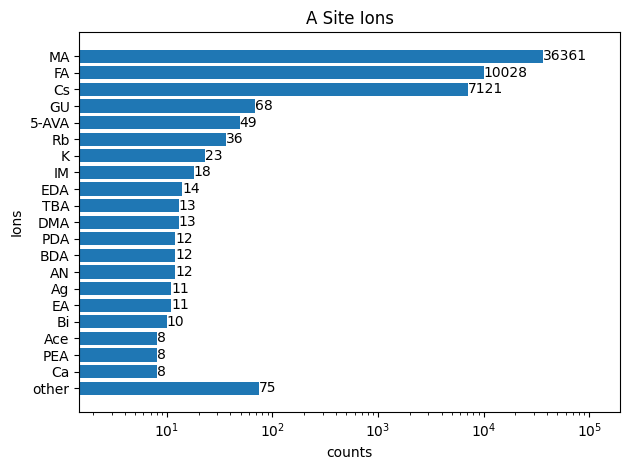

In [90]:
a_ions = comp_data["a_ions"].str.replace(r'[()\s]',"", regex=True).str.split(";")
a_ions = a_ions.explode()
plot_barh(
    a_ions.value_counts(),
    title="A Site Ions",
    ylabel="Ions"
)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'B Site Ions'}, xlabel='counts', ylabel='Ions'>)

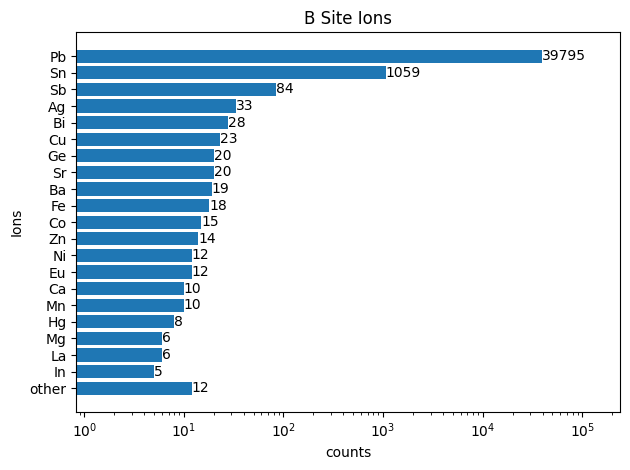

In [87]:
b_ions = comp_data["b_ions"].str.replace(r'[()\s]',"", regex=True).str.split(";")
b_ions = b_ions.explode()
plot_barh(
    b_ions.value_counts(),
    title="B Site Ions",
    ylabel="Ions"
)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'X Site Ions'}, xlabel='counts', ylabel='Ions'>)

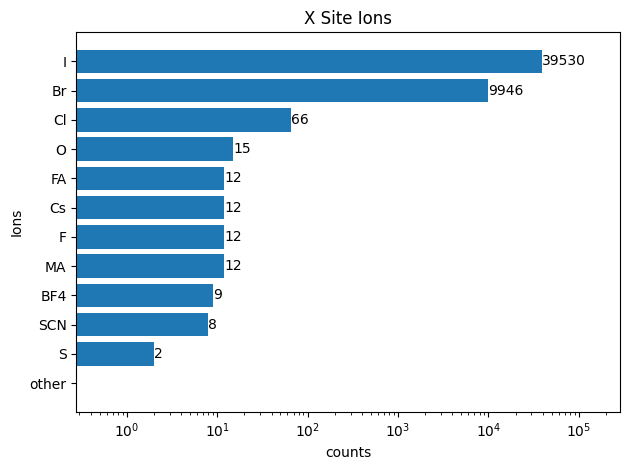

In [89]:
c_ions = comp_data["c_ions"].str.replace(r'[()\s]',"", regex=True).str.split(";")
c_ions = c_ions.explode()
plot_barh(
    c_ions.value_counts(),
    title="X Site Ions",
    ylabel="Ions"
)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Perovskite Ion Frequency'}, xlabel='counts', ylabel='Ions'>)

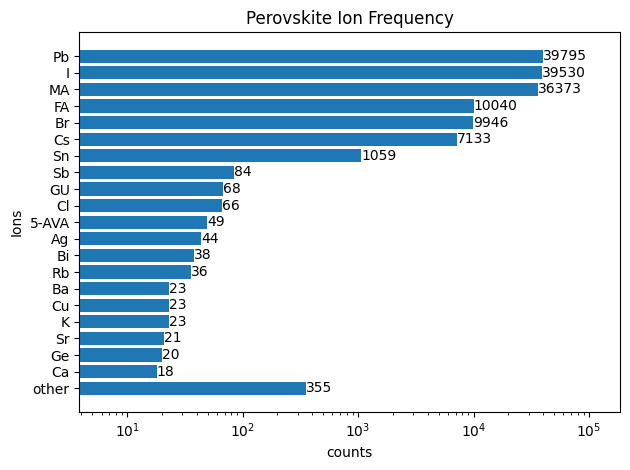

In [84]:
all_ions = pd.Series(list(a_ions) + list(b_ions) + list(c_ions))
all_ions = all_ions.explode()
plot_barh(
    all_ions.value_counts(),
    title="Perovskite Ion Frequency",
    ylabel="Ions"
)